該 import 的東西都差不多 import 完了，所以可以直接複製這個檔案作為開頭 section，直接開始後面的分析。

In [2]:
# import required packages, though not all of them are actually used
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab
import matplotlib.dates as mpl_dates
%matplotlib inline

import mplfinance as mpf 
from mplfinance.original_flavor import candlestick_ohlc
# set fig size; bigger DPI results in bigger fig
plt.rcParams["figure.dpi"] = 100

import seaborn as sns
import pandas as pd
import numpy as np
import sympy as sp
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
from statsmodels.stats.stattools import durbin_watson as sdw
import statsmodels.stats.libqsturng
import plotly.express as px
from datetime import datetime

import stemgraphic as stem

# from ete3 import Tree, faces, AttrFace, TreeStyle, TextFace

# from mgt2001 import *

import mgt2001
from mgt2001.hyp.ind import two_population, two_population_proportion
import mgt2001.hyp.anova as anova
import mgt2001.hyp.chi2 as chi2
import mgt2001.hyp.non as non

import random
import itertools
import math

plt.style.use('ggplot') # refined style

mgt2001.__version__ # show version of mgt2001

'0.4.1.4'

## Data Processing

In [3]:
movie_df = pd.read_excel('../data/sorted_all_movie.xlsx', index_col=0)
covid_date = datetime(2020, 3, 1)
movie_df['has_collection'] = movie_df['belongs_to_collection'].isna().replace({True: 0, False: 1})
movie_df['pre_covid'] = (movie_df['release_date'] < covid_date).replace({True: 1, False: 0})
movie_df['post_covid'] = (movie_df['release_date'] >= covid_date).replace({True: 1, False: 0})
movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.year)
movie_df['release_month'] = movie_df['release_date'].apply(lambda x: x.month)

display(movie_df.head())
display(movie_df.tail())

,id,title,budget,genres,original_language,production_companies,release_date,TW_release_date,revenue,runtime,...,rating,rotten_aud_score,zh_title,belongs_to_collection,has_homepage,has_collection,pre_covid,post_covid,release_year,release_month
0,4234,Scream 3,40000000,"['Horror', 'Mystery']",en,"['Craven-Maddalena Films', 'Dimension Films', ...",2000-02-03,NaN,161834276,116,...,R,37.0,驚聲尖叫3：終結篇,Scream Collection,0,1,1,0,2000,2
1,1907,The Beach,40000000,"['Drama', 'Adventure', 'Romance', 'Thriller']",en,['Figment Films'],2000-02-03,NaN,144056873,119,...,R,57.0,海灘,NaN,0,0,1,0,2000,2
2,15655,The Tigger Movie,30000000,"['Family', 'Animation', 'Comedy']",en,"['Disney Television Animation', 'DisneyToon St...",2000-02-11,NaN,45554533,77,...,G,62.0,跳跳虎歷險記,NaN,1,0,1,0,2000,2
3,14181,Boiler Room,7000000,"['Crime', 'Drama', 'Thriller']",en,['New Line Cinema'],2000-02-18,NaN,28780255,118,...,R,78.0,搶錢大作戰,NaN,0,0,1,0,2000,2
4,2069,The Whole Nine Yards,41300000,"['Comedy', 'Crime']",en,"['Franchise Pictures', 'Morgan Creek Productio...",2000-02-18,NaN,106371651,98,...,R,64.0,殺手不眨眼,The Whole Nine/Ten Yards Collection,0,1,1,0,2000,2


,id,title,budget,genres,original_language,production_companies,release_date,TW_release_date,revenue,runtime,...,rating,rotten_aud_score,zh_title,belongs_to_collection,has_homepage,has_collection,pre_covid,post_covid,release_year,release_month
3167,460465,Mortal Kombat,20000000,"['Action', 'Fantasy', 'Adventure']",en,"['Atomic Monster', 'Broken Road Productions', ...",2021-04-07,NaN,76706000,110,...,R,86.0,真人快打,NaN,1,0,0,1,2021,4
3168,637649,Wrath of Man,40000000,"['Action', 'Crime']",en,"['Miramax', 'Metro-Goldwyn-Mayer', 'Toff Guy F...",2021-04-22,2021-04-29T00:00:00.000Z,80648577,119,...,R,91.0,玩命鈔劫,NaN,1,0,0,1,2021,4
3169,520663,The Woman in the Window,4000000,"['Crime', 'Mystery', 'Thriller']",en,"['Fox 2000 Pictures', 'Scott Rudin Productions...",2021-05-14,NaN,0,102,...,R,36.0,窺探,NaN,1,0,0,1,2021,5
3170,503736,Army of the Dead,90000000,"['Action', 'Horror', 'Thriller']",en,['The Stone Quarry'],2021-05-14,NaN,780000,148,...,NaN,NaN,活屍大軍,Army of the Dead Collection,1,1,0,1,2021,5
3171,337404,Cruella,200000000,"['Comedy', 'Crime']",en,['Walt Disney Pictures'],2021-05-26,NaN,46586903,134,...,PG-13,97.0,時尚惡女：庫伊拉,Cruella Collection,1,1,0,1,2021,5


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



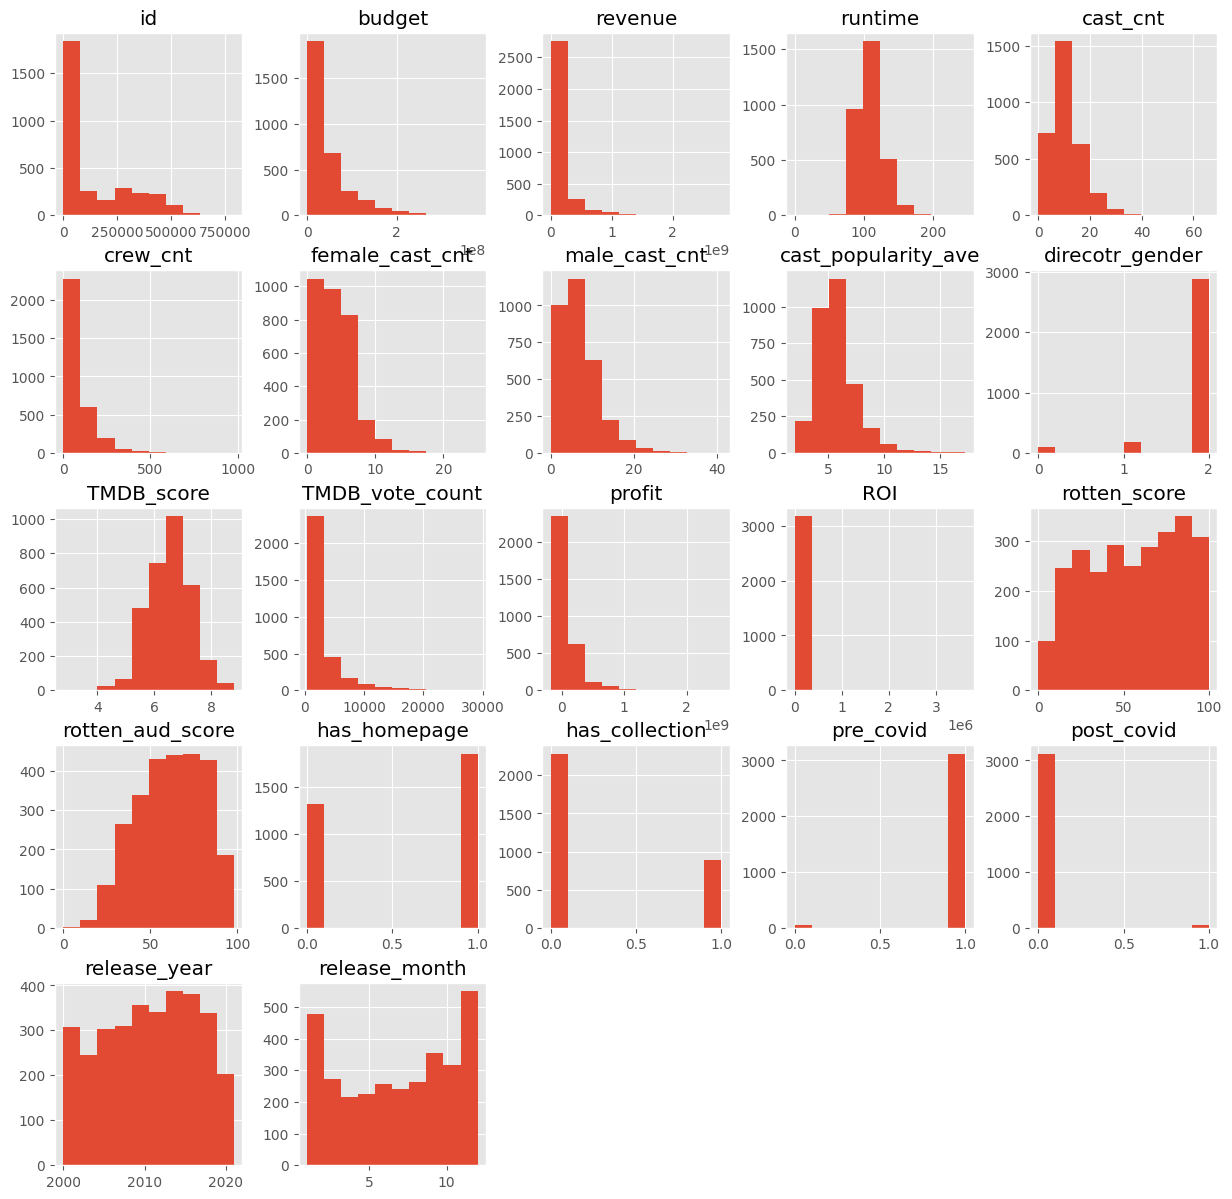

In [4]:
movie_df.hist(figsize=(15, 15))
plt.show()

可以看出裡面有需多 outliers，這些 data points 很可能影響到整體結果，所以我們將不考慮這些電影的計算。

在這邊，我們也可以看到 "revenue"、"budget"、"ROI" 這三個重點項目都不是常態分佈，要做分析的話會有點困難。這時候，我們可以採用 `np.log1p()` 來做 data transformation。如要要做預測的話，則是用 `np.exp1p()` 來還原。這部分，會在去除玩異質之後統一處理。

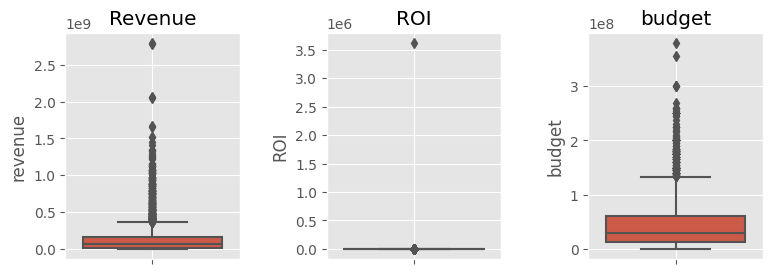

In [5]:
# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

<div class="alert alert-block alert-info">
<b>你知道嗎？</b> 票房最高的電影是 2019 年上映的復仇者聯盟：終局之戰。</div>

In [6]:
movie_df[movie_df['revenue'] == movie_df['revenue'].max()]

,id,title,budget,genres,original_language,production_companies,release_date,TW_release_date,revenue,runtime,...,rating,rotten_aud_score,zh_title,belongs_to_collection,has_homepage,has_collection,pre_covid,post_covid,release_year,release_month
3005,299534,Avengers: Endgame,356000000,"['Adventure', 'Science Fiction', 'Action']",en,['Marvel Studios'],2019-04-24,2019-04-24T00:00:00.000Z,2797800564,181,...,PG-13,90.0,復仇者聯盟：終局之戰,The Avengers Collection,1,1,1,0,2019,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2248 non-null   int64         
 1   title                  2248 non-null   object        
 2   budget                 2248 non-null   int64         
 3   genres                 2248 non-null   object        
 4   original_language      2248 non-null   object        
 5   production_companies   2248 non-null   object        
 6   release_date           2248 non-null   datetime64[ns]
 7   TW_release_date        500 non-null    object        
 8   revenue                2248 non-null   int64         
 9   runtime                2248 non-null   int64         
 10  cast                   2248 non-null   object        
 11  cast_cnt               2248 non-null   int64         
 12  crew_cnt               2248 non-null   int64         
 13  fem

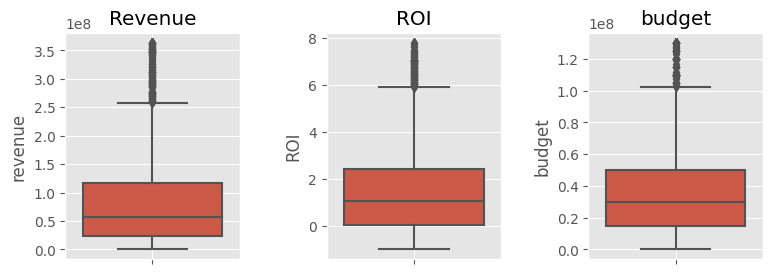

In [7]:
rev_outlier = mgt2001.des.outlier(movie_df['revenue'].dropna(), show=False)[0]
roi_outlier = mgt2001.des.outlier(movie_df['ROI'].dropna(), show=False)[0]
budget_outlier = mgt2001.des.outlier(movie_df['budget'].dropna(), show=False)[0]

def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values) == False]

rev_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
rev_df = filter_rows_by_values(rev_df, 'revenue', rev_outlier).reset_index(drop=True)
roi_df = filter_rows_by_values(movie_df, 'ROI', roi_outlier).reset_index(drop=True)
budget_df = filter_rows_by_values(movie_df, 'budget', budget_outlier).reset_index(drop=True)

u_movie_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
u_movie_df = filter_rows_by_values(u_movie_df, 'revenue', rev_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'ROI', roi_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'budget', budget_outlier).reset_index(drop=True)

print(u_movie_df.info()) 

# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=u_movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=u_movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=u_movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

這明顯已經較上面所看到的 box plots 好上許多。因此我們便用剩下的 2248 筆資料進行更近一步的分析。另外，在這邊也要注意到，不是所有的 column 都是 2248 筆資料，有些 data 是有少的。所以在做分析時要格外小心。

In [8]:
u_movie_df['log_revenue'] = np.log1p(u_movie_df['revenue'])
u_movie_df['log_budget'] = np.log1p(u_movie_df['budget'])
u_movie_df['log_ROI'] = np.log1p(u_movie_df['ROI'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



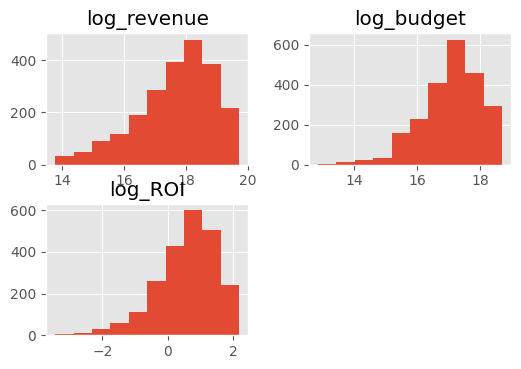

In [9]:
u_movie_df[['log_revenue', 'log_budget', 'log_ROI']].hist()
plt.show()

## Data Analysis

### 七、票房與電影級數的關係
動機：因不同電影分級也代表該電影的客群範圍大小不盡相同，因此我們想探討電影分級是否會影響票房。

In [10]:
data7 = u_movie_df[['revenue', 'rating']]
print('Head of dataset:')
display(data7.head())

print("Tail of dataset:")
display(data7.tail())

print(data7.shape)

Head of dataset:


,revenue,rating
0,161834276,R
1,144056873,R
2,45554533,G
3,28780255,R
4,106371651,R


Tail of dataset:


,revenue,rating
2243,6416063,R
2244,47019435,R
2245,30763855,PG-13
2246,76706000,R
2247,80648577,R


(2248, 2)


去除NaN值：

In [11]:
data7 = data7[~pd.isnull(data7['rating'])].reset_index(drop=True)
print(data7.shape)

(1880, 2)


In [12]:
rating = data7['rating'].unique()
n = len(rating)
print(n, rating)

7 ['R' 'G' 'PG-13' 'PG' 'TVG' 'NC-17' 'TVMA']


分級共有7種，將其編號1~7

#### Scatter Plot

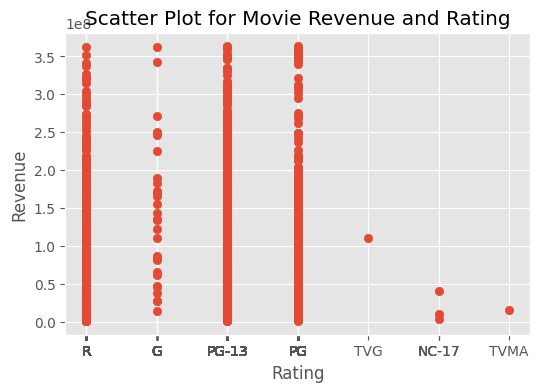

In [13]:
plt.scatter(data7['rating'], data7['revenue'])
plt.title('Scatter Plot for Movie Revenue and Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.xticks(data7['rating'])
plt.show()

可以看到NC-17、TVG、TVMA的資料筆數很少。

#### 用各分級平均票房畫 Bar Chart

In [14]:
rate_ave = []

for i in range(n):
    rate_ave.append(data7['revenue'][data7['rating'] == rating[i]].mean())
    
print(rate_ave)

[69217640.4067599, 141421645.60714287, 100544167.35246997, 122453325.34583333, 110230332.0, 18113892.666666668, 15600000.0]


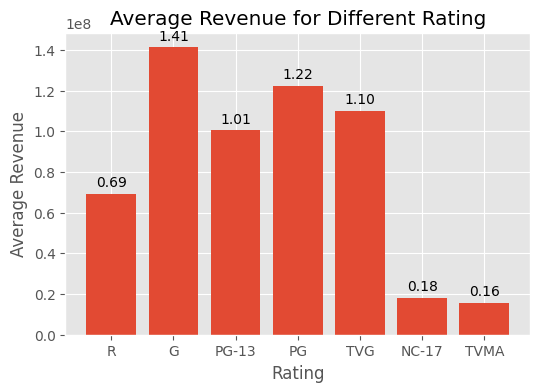

In [15]:
fig, ax = plt.subplots()
rects1 = ax.bar(rating, rate_ave, width=0.8, bottom=None, align='center')
plt.ylabel('Average Revenue')
plt.xlabel('Rating')
plt.title('Average Revenue for Different Rating')
plt.xticks(rating)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = (rect.get_height())
        plt.annotate('{:.2f}'.format(height / 1e8),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (0, 3),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom')

autolabel(rects1)
plt.show()

In [16]:
data7.groupby(['rating']).describe()

revenue                                                         \
         count          mean           std          min           25%   
rating                                                                  
G         28.0  1.414216e+08  9.367441e+07   14460000.0  6.493822e+07   
NC-17      3.0  1.811389e+07  1.943852e+07    3909002.0  7.037348e+06   
PG       240.0  1.224533e+08  8.744515e+07    1117920.0  5.786440e+07   
PG-13    749.0  1.005442e+08  8.230363e+07     970816.0  3.850234e+07   
R        858.0  6.921764e+07  6.749155e+07     992181.0  1.907733e+07   
TVG        1.0  1.102303e+08           NaN  110230332.0  1.102303e+08   
TVMA       1.0  1.560000e+07           NaN   15600000.0  1.560000e+07   

                                                
                50%           75%          max  
rating                                          
G       135207240.5  1.851369e+08  362211740.0  
NC-17    10165694.0  2.521634e+07   40266982.0  
PG      102535721.5  1.642362e+08  363204635.0  
PG-13    74541707.0  1.473327e+08  363164265.0  
R        47089960.0  9.705118e+07  362000072.0  
TVG     110230332.0  1.102303e+08  110230332.0  
TVMA     15600000.0  1.560000e+07   15600000.0

※資料筆數差異很大，不考慮NC-17、TVG、TVMA  
G的票房看起來最高，R的票房看起來最低，進一步檢定是否如此。

In [17]:
rating = np.delete(rating, [4, 5, 6])
n = len(rating)
print(n, rating)

4 ['R' 'G' 'PG-13' 'PG']


將分級編號為1~4。

In [18]:
data7 = data7[data7['rating'] != 'NC-17'].reset_index(drop=True)
data7 = data7[data7['rating'] != 'TVG'].reset_index(drop=True)
data7 = data7[data7['rating'] != 'TVMA'].reset_index(drop=True)
print(data7.shape)

(1875, 2)


#### Check Normality

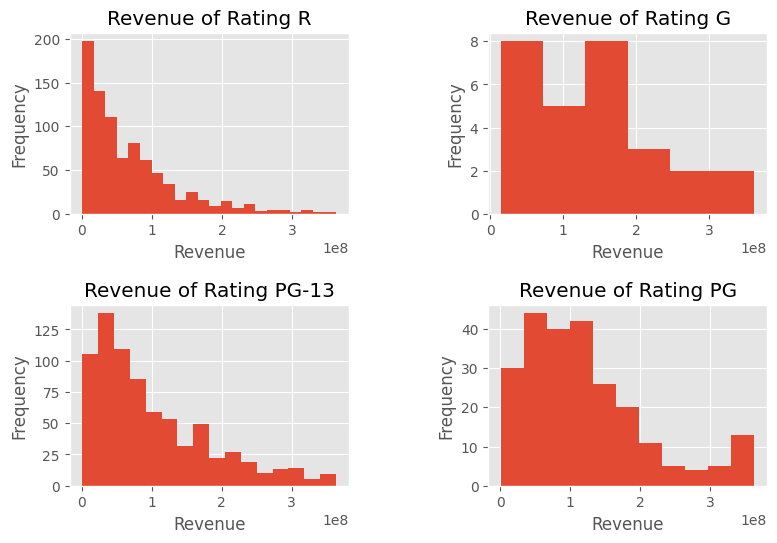

In [19]:
fig = plt.figure(figsize = (9, 6))
row, col = 2, 2
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

for i in range(n):
    ax = fig.add_subplot(row, col, i + 1)
    ax = data7['revenue'][data7['rating'] == rating[i]].hist(bins = 'auto')
    plt.title('Revenue of Rating ' + rating[i])
    plt.ylabel('Frequency')
    plt.xlabel('Revenue')
    
plt.show()

明顯看得出來資料不是常態分佈，因此使用無母數檢定的Kruskal-Wallis Test。

#### Kruskal-Wallis Test

$H_0:$ The locations of all the 9 populations are the same.  
$H_1:$ At least two population locations differ.  
Significance level $\alpha = 0.05$.

In [20]:
stats.kruskal(data7['revenue'][data7['rating'] == 'PG-13'], data7['revenue'][data7['rating'] == 'R'], 
              data7['revenue'][data7['rating'] == 'G'], data7['revenue'][data7['rating'] == 'PG'])

KruskalResult(statistic=146.36321236248995, pvalue=1.6040787928548173e-31)

$p$-value $< 0.05$, which means at least two population locations differ.  
表示不同電影分級的票房有差異，進一步將電影分級兩兩分組，以Mann–Whitney U Test檢定其之間的關係。

#### Mann–Whitney U Test

In [21]:
rate_comb = list(itertools.combinations(rating, 2))
print(rate_comb)

[('R', 'G'), ('R', 'PG-13'), ('R', 'PG'), ('G', 'PG-13'), ('G', 'PG'), ('PG-13', 'PG')]


用來儲存結果的二維陣列

In [22]:
rate_comb_result = []

for m1 in range(n):
    rate_comb_result.append([])
    for m2 in range(n):
        rate_comb_result[m1].append([])

$H_0:$ The two population locations are the same in terms of revenue.  
$H_1:$ The two population locations are not the same in terms of revenue.

只印出可以reject $H_0$的月份組合

In [23]:
diff_rate = [] #r1 != r2
for (r1, r2) in rate_comb:
    #print('(', r1, ', ', r2, ')')
    try:
        result = stats.mannwhitneyu(data7['revenue'][data7['rating'] == r1], data7['revenue'][data7['rating'] == r2], alternative = 'two-sided')
        if result.pvalue < 0.05:
            print('(', r1, ' != ', r2, '): ', result, sep = '')
            diff_rate.append((r1, r2))
            rate_comb_result[np.where(rating == r1)[0][0]][np.where(rating == r2)[0][0]] = '!='
            rate_comb_result[np.where(rating == r2)[0][0]][np.where(rating == r1)[0][0]] = '!='
        else:
            rate_comb_result[np.where(rating == r1)[0][0]][np.where(rating == r2)[0][0]] = '='
            rate_comb_result[np.where(rating == r2)[0][0]][np.where(rating == r1)[0][0]] = '='
    except ValueError:
        continue
    
print(diff_rate)

(R != G): MannwhitneyuResult(statistic=5913.0, pvalue=4.7292168263876084e-06)
(R != PG-13): MannwhitneyuResult(statistic=239652.5, pvalue=1.3602058180648512e-18)
(R != PG): MannwhitneyuResult(statistic=59601.0, pvalue=1.7859248458106196e-23)
(G != PG-13): MannwhitneyuResult(statistic=13420.0, pvalue=0.011878035773693481)
(PG-13 != PG): MannwhitneyuResult(statistic=74063.0, pvalue=4.006314871981351e-05)
[('R', 'G'), ('R', 'PG-13'), ('R', 'PG'), ('G', 'PG-13'), ('PG-13', 'PG')]


針對以上這些月份再做left tail和right tail

In [24]:
less_rate = [] #r1 < r2
greater_rate = [] #r1 > r2
for (r1, r2) in diff_rate:
    l_result = stats.mannwhitneyu(data7['revenue'][data7['rating'] == r1], data7['revenue'][data7['rating'] == r2], alternative = 'less')
    r_result = stats.mannwhitneyu(data7['revenue'][data7['rating'] == r1], data7['revenue'][data7['rating'] == r2], alternative = 'greater')
    if l_result.pvalue < 0.05:
        print('(', r1, ' < ', r2, '): ', l_result, sep = '')
        less_rate.append((r1, r2))
        rate_comb_result[np.where(rating == r1)[0][0]][np.where(rating == r2)[0][0]] = '<'
        rate_comb_result[np.where(rating == r2)[0][0]][np.where(rating == r1)[0][0]] = '>'
    elif r_result.pvalue < 0.05:
        print('(', r1, ' > ', r2, '): ', r_result, sep = '')
        greater_rate.append((r1, r2))
        rate_comb_result[np.where(rating == r1)[0][0]][np.where(rating == r2)[0][0]] = '>'
        rate_comb_result[np.where(rating == r2)[0][0]][np.where(rating == r1)[0][0]] = '<'
        
print(less_rate)
print(greater_rate)

(R < G): MannwhitneyuResult(statistic=5913.0, pvalue=2.3646084131938042e-06)
(R < PG-13): MannwhitneyuResult(statistic=239652.5, pvalue=6.801029090324256e-19)
(R < PG): MannwhitneyuResult(statistic=59601.0, pvalue=8.929624229053098e-24)
(G > PG-13): MannwhitneyuResult(statistic=13420.0, pvalue=0.005939017886846741)
(PG-13 < PG): MannwhitneyuResult(statistic=74063.0, pvalue=2.0031574359906754e-05)
[('R', 'G'), ('R', 'PG-13'), ('R', 'PG'), ('PG-13', 'PG')]
[('G', 'PG-13')]


In [25]:
for i in range(n):
    print(rating[i], rate_comb_result[i])

R [[], '<', '<', '<']
G ['>', [], '>', '=']
PG-13 ['>', '<', [], '<']
PG ['>', '=', '>', []]


結論：  
G和PG的票房大於所有其他電影分級，再來是PG-13，R的票房最低。  
G和PG兩者彼此差不多，很合理，因為這兩個都算普遍級，但PG是建議家長指導。  
而PG-13能看的人數比R多，票房較高也合理。

### 八、票房與上映時間的關係

#### 1. 寒暑假比較多電影？

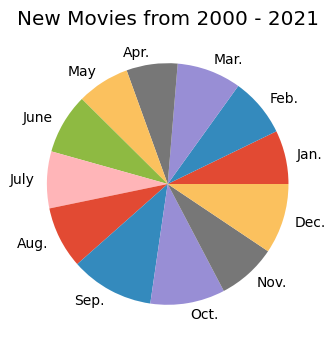

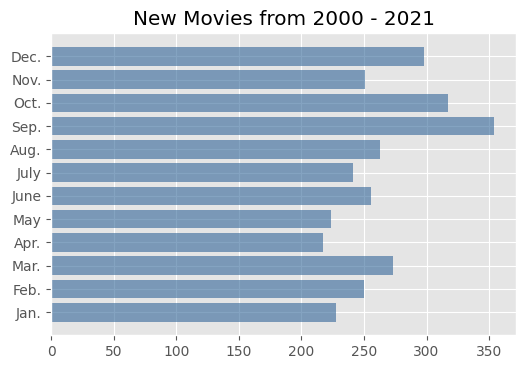

In [26]:
month = 0
vacay = 0

y = np.array([228, 250, 273, 217, 224, 256, 241, 263, 354, 317, 251, 298])
x = np.array(['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])
mylabels = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']

plt.pie(y, labels = mylabels)
plt.title("New Movies from 2000 - 2021")
plt.show() 

plt.barh(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.title("New Movies from 2000 - 2021")
plt.show()

In [27]:
y = np.array([[2000, 0, 8, 10, 8, 8, 9, 8, 9, 6, 6, 8, 13], [2001, 7, 4, 5, 9, 6, 11, 16, 9, 4, 12, 9, 13], [2002,8, 12, 11, 8, 7, 9, 10, 7, 5, 12, 5, 15], \
             [2003, 9, 8, 11, 8, 13, 7, 9, 11, 13, 8, 11, 11], [2004, 7, 11, 10, 13, 9, 12, 9, 7, 14, 14, 10, 11], [2005, 12, 8, 9, 10, 7, 12, 9, 11, 25, 16, 12, 12], \
             [2006, 12, 11, 20, 7, 9, 13, 14, 14, 20, 12, 10, 19], [2007, 5, 13, 14, 9, 8, 17, 8, 14, 20, 15, 16, 14], [2008, 15, 16, 6, 11, 9, 9, 15, 15, 18, 17, 10, 16], \
             [2009, 11, 14, 18, 12, 11, 18, 11, 12, 24, 22, 15, 12], [2010, 10, 14, 18, 12, 10, 18, 13, 14, 23, 17, 15, 12],  [2011, 9, 15, 15, 13, 13, 10, 14, 17, 27, 18, 15, 13], \
             [2012, 15, 9, 20, 13, 12, 13, 7, 19, 24, 10, 10, 10], [2013, 17, 10, 15, 15, 15, 12, 20, 15, 23, 21, 12, 17], [2014, 15, 15, 16, 16, 19, 10, 11, 16, 17, 25, 11, 24], \
             [2015, 15, 10, 11, 12, 14, 14, 17, 13, 18, 22, 15, 16], [2016,14, 20, 15, 15, 14, 19, 15, 12, 20, 14, 25, 20], [2017, 13, 16, 20, 7, 11, 18, 11, 14, 19, 20, 10, 15], \
             [2018, 11, 15, 11, 9, 13, 12, 12, 16, 17, 17, 15, 17], [2019, 10, 8, 11, 7, 13, 10, 6, 13, 13, 15, 13, 13], [2020, 10, 7, 2, 1, 0, 3, 6, 5, 4, 4, 4, 5], [2021, 3, 6, 5, 2, 3, None, None, None, None, None, None, None]])
month_df = pd.DataFrame(y, columns = ["Years",'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])
display(month_df)
y_2 = np.array([[2000, 30, 63], [2001, 38, 67], [2002, 32, 77], [2003, 31, 88], [2004, 27, 100], [2005, 32, 111], [2006, 47, 114],\
       [2007, 36, 117], [2008, 51, 106], [2009, 35, 145], [2010, 39, 137], [2011, 44, 135], [2012, 36, 126], [2013, 52, 140],\
       [2014, 51, 144], [2015, 46, 131], [2016, 47, 156], [2017, 40, 134], [2018, 45, 120], [2019, 32, 100]])#, [2020, 16, 35]])
vacay_df = pd.DataFrame(y_2, columns = ['Years', '12, 7, 8', 'rest'])

vacay_df['sum'] = vacay_df['12, 7, 8'] + vacay_df['rest']
display(vacay_df)

,Years,Jan.,Feb.,Mar.,Apr.,May,June,July,Aug.,Sep.,Oct.,Nov.,Dec.
0,2000,0,8,10,8,8,9,8,9,6,6,8,13
1,2001,7,4,5,9,6,11,16,9,4,12,9,13
2,2002,8,12,11,8,7,9,10,7,5,12,5,15
3,2003,9,8,11,8,13,7,9,11,13,8,11,11
4,2004,7,11,10,13,9,12,9,7,14,14,10,11
5,2005,12,8,9,10,7,12,9,11,25,16,12,12
6,2006,12,11,20,7,9,13,14,14,20,12,10,19
7,2007,5,13,14,9,8,17,8,14,20,15,16,14
8,2008,15,16,6,11,9,9,15,15,18,17,10,16
9,2009,11,14,18,12,11,18,11,12,24,22,15,12


,Years,"12, 7, 8",rest,sum
0,2000,30,63,93
1,2001,38,67,105
2,2002,32,77,109
3,2003,31,88,119
4,2004,27,100,127
5,2005,32,111,143
6,2006,47,114,161
7,2007,36,117,153
8,2008,51,106,157
9,2009,35,145,180


Only pick data from 2000 to 2019 due to the pandemic in 2020 and the imcompleteness of data in 2021.

In [28]:
df_compare_rating_1 = vacay_df[['12, 7, 8', 'rest']]
df_compare_rating_1 = df_compare_rating_1.dropna().reset_index()
#display(df_compare_rating_1)

In [29]:
df_compare_rating_1['rest'] = df_compare_rating_1['rest'] / 9
df_compare_rating_1['12, 7, 8'] = df_compare_rating_1['12, 7, 8'] / 3
display(df_compare_rating_1)

,index,"12, 7, 8",rest
0,0,10.000000,7.000000
1,1,12.666667,7.444444
2,2,10.666667,8.555556
3,3,10.333333,9.777778
4,4,9.000000,11.111111
5,5,10.666667,12.333333
6,6,15.666667,12.666667
7,7,12.000000,13.000000
8,8,17.000000,11.777778
9,9,11.666667,16.111111


##### Check Normality

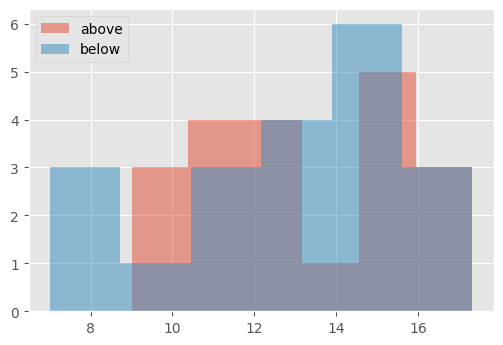

In [30]:
_ = plt.hist(df_compare_rating_1['12, 7, 8'], bins = 'auto', alpha=0.5, label='above')
_ = plt.hist(df_compare_rating_1['rest'], bins = 'auto', alpha=0.5, label='below')
plt.legend()
plt.show()

明顯並非常態分佈，故使用 Kruskal-Wallis Test

$H_0:$ The two population locations are the same.<br>
$H_1:$ The location of population 1 (7,8,12) is to the right of the location of population 2 (rest).

In [31]:
stats.kruskal(df_compare_rating_1['12, 7, 8'], df_compare_rating_1['rest'])

KruskalResult(statistic=0.03095238095238126, pvalue=0.8603466677154216)

p-value 大於 0.05，沒有足夠的證據拒絕虛無假設。  
結論：沒有足夠的證據顯示寒暑假上映的電影比較多。

#### 2. 過年大片是不是真的比較夯？
雖然沒有台灣過年發布電影的數據，但我們也可以看看全世界在所謂的**聖誕假期**上映的電影是否有更好的票房。

##### Time Series 
先看一下是否每年的這個季節都有一個 seasonal pattern 存在。（不考慮後 COVID 時期）

In [72]:
def get_every_x_mas(min_year, max_year, period=11, start_date=(12, 24)):
    date_lst = []
    for year in range(min_year, max_year):
        date_lst += pd.date_range(datetime(year, *start_date), periods=period).tolist()
    return date_lst

In [73]:
rev_ts = u_movie_df[['title', 'release_date', 'revenue', 'budget', 'ROI', 'TW_release_date', 'log_revenue', 'log_budget', 'log_ROI']][u_movie_df['release_date'] < covid_date].sort_values(by='release_date').reset_index(drop=True)

In [74]:
rev_ts['Time'] = rev_ts['release_date'].apply(mpl_dates.date2num)

x_name = 'Time'
y_name = 'revenue'

rev_df = rev_ts.set_index('release_date')

min_year = rev_ts.release_date.min().year
max_year = rev_ts.release_date.max().year

greater_x_mas_date = get_every_x_mas(min_year, max_year, period=25, start_date=(12, 10))

rev_ts['is_xmas'] = rev_ts['release_date'].apply(lambda x: 1 if x in greater_x_mas_date else 0)
rev_ts['release_year'] = rev_ts['release_date'].apply(lambda x: x.year)
rev_ts['release_month'] = rev_ts['release_date'].apply(lambda x: x.month)
display(rev_ts.head())
print(np.sum(rev_ts['is_xmas'] == 1))

,title,release_date,revenue,budget,ROI,TW_release_date,log_revenue,log_budget,log_ROI,Time,is_xmas,release_year,release_month
0,Scream 3,2000-02-03,161834276,40000000,3.045857,NaN,18.902083,17.504390,1.397693,10990.0,0,2000,2
1,The Beach,2000-02-03,144056873,40000000,2.601422,NaN,18.785719,17.504390,1.281329,10990.0,0,2000,2
2,The Tigger Movie,2000-02-11,45554533,30000000,0.518484,NaN,17.634421,17.216708,0.417713,10998.0,0,2000,2
3,Boiler Room,2000-02-18,28780255,7000000,3.111465,NaN,17.175200,15.761421,1.413779,11005.0,0,2000,2
4,The Whole Nine Yards,2000-02-18,106371651,41300000,1.575585,NaN,18.482450,17.536373,0.946077,11005.0,0,2000,2


183


從 release_month histogram 來看，我們可以發現，確實在冬天所上映的電影較夏天為多。  
我們將聖誕假期的期限延長一點（從 12/10 到 1/4），這讓我們擁有 183 部在「聖誕季節」上映的電影。

In [75]:
rev_df.resample('M').agg(dict(revenue='mean')).to_period('M')

,revenue
release_date,
2000-02,8.170775e+07
2000-03,1.081047e+08
2000-04,5.755547e+07
2000-05,1.452588e+08
2000-06,1.670427e+08
...,...
2019-10,7.086674e+07
2019-11,9.973411e+07
2019-12,8.931415e+07


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



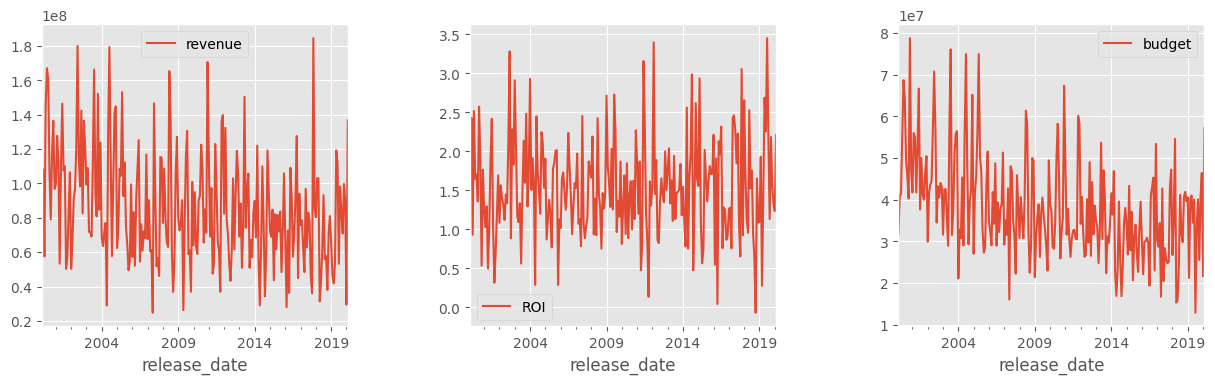

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
rev_df.resample('M').agg(dict(revenue='mean')).to_period('M').plot(ax=axes[0])
rev_df.resample('M').agg(dict(ROI='mean')).to_period('M').plot(ax=axes[1])
rev_df.resample('M').agg(dict(budget='mean')).to_period('M').plot(ax=axes[2])
plt.show()

從上面的折線圖，我們可以看到，票房和時間似乎有一定的順序在。  
所以我們使用 Time Series 做一次 regression，分別用 month 和 quarter 來做比較。

**月線**：以月為單位

In [77]:
rev_by_month_df = rev_df.resample('M').agg('mean').to_period('M')
rev_by_month_df.reset_index(inplace=True)
rev_by_month_df['month'] = rev_by_month_df['release_date'].apply(lambda x: x.month)
rev_by_month_df['release_date'] = rev_by_month_df['release_date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m'))
rev_by_month_df['Time'] = np.arange(0, rev_by_month_df.shape[0] + 0)
rev_by_month_df.head()

,release_date,revenue,budget,ROI,log_revenue,log_budget,log_ROI,Time,month
0,2000-02-01,8.170775e+07,31900000.0,1.704464,18.007960,17.146781,0.861179,0,2
1,2000-03-01,1.081047e+08,40850000.0,2.428687,18.225011,17.265964,0.959047,1,3
2,2000-04-01,5.755547e+07,41375000.0,0.930673,17.614707,17.301844,0.312864,2,4
3,2000-05-01,1.452588e+08,54500000.0,2.516641,18.399414,17.578196,0.821218,3,5
4,2000-06-01,1.670427e+08,68725000.0,1.647320,18.692611,17.868241,0.824370,4,6


In [78]:
x_name = 'Time'
y_name = 'revenue'

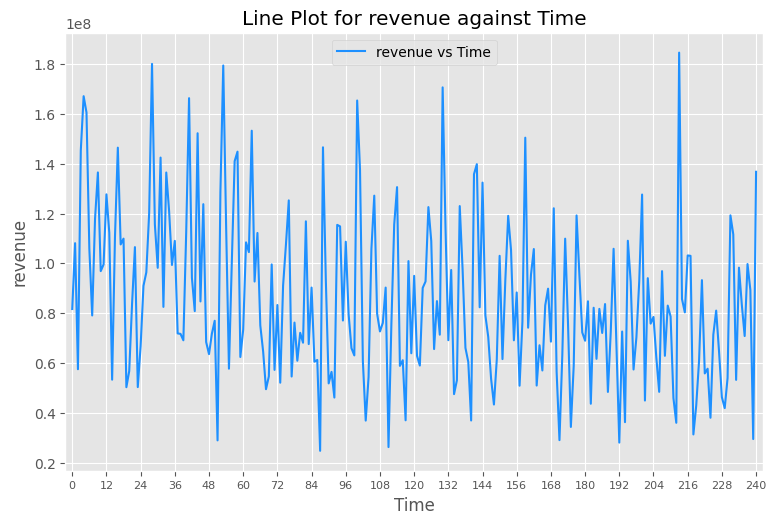

In [79]:
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(rev_by_month_df[x_name], rev_by_month_df[y_name], color="dodgerblue", label=f'{y_name} vs {x_name}')
plt.xticks(rev_by_month_df[x_name], rotation=0, fontsize=8)

# slope, intercept, r_value, p_value, std_err = stats.linregress(rev_by_month_df[x_name], rev_by_month_df[y_name])  # order matters
# ax = sns.regplot(x=x_name, y=y_name, data=rev_by_month_df, ci=None, scatter_kws={'color': 'dodgerblue', 'alpha': 0}, line_kws={
#                 'color': '#ffaa77', 'label': f"$\hat y = {intercept:.4f} + {slope:.4f} x$"}) # 這樣才有 regression model
plt.subplots_adjust(bottom=0.15)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title(f'Line Plot for {y_name} against {x_name}')

ax.set_xticks(ax.get_xticks()[::12]) # show the data of the first month for each year
plt.margins(x=.01, tight=False)
plt.legend()
plt.show()

通常五月和十一月附近是高峰期，但這個現象在後期有點被打亂，所以做出來的預測結果不為完全正確。

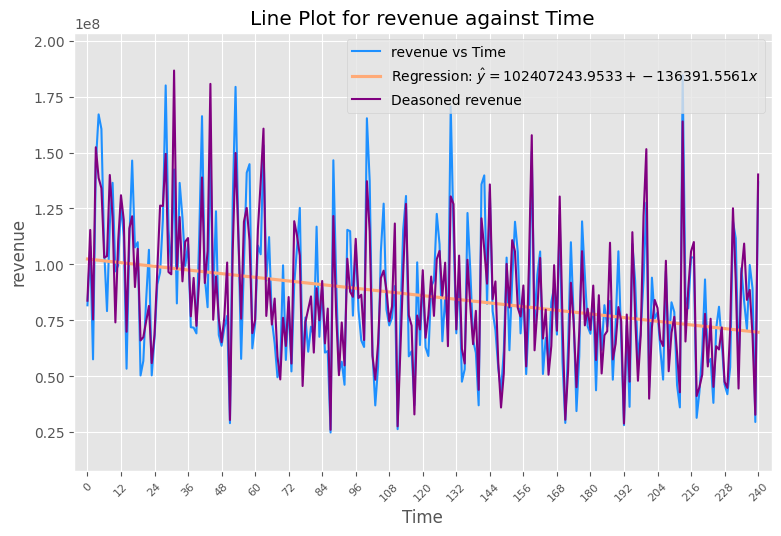

In [80]:
des_df = mgt2001.ts.smoothing(rev_by_month_df, y_name, x_name, period=12, option='cma')
des_df.head()

des_y_name = f'Des_{y_name}'

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(rev_by_month_df[x_name], rev_by_month_df[y_name], color="dodgerblue", label=f'{y_name} vs {x_name}')
plt.xticks(rev_by_month_df[x_name], rotation=45, fontsize=8)

slope, intercept, r_value, p_value, std_err = stats.linregress(des_df[x_name], des_df[des_y_name])  # order matters
ax = sns.regplot(x=x_name, y=des_y_name, data=des_df, ci=None, scatter_kws={'color': 'dodgerblue', 'alpha': 0}, line_kws={
                'color': '#ffaa77', 'label': f"Regression: $\hat y = {intercept:.4f} + {slope:.4f} x$"}) # 這樣才有 regression model
plt.plot(des_df[des_y_name], label=f'Deasoned {y_name}', color='purple')
plt.subplots_adjust(bottom=0.15)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title(f'Line Plot for {y_name} against {x_name}')
ax.set_xticks(ax.get_xticks()[::12]) # show the data of the first month for each year
mgt2001.add_margin(ax, x=0.02)
plt.legend()
plt.show()

In [81]:
dd = pd.DataFrame(des_df['SeaIdx'][:12])
dd['Month'] = (dd.index) % 12 + 1
dd['Month'] = np.append(dd['Month'].shift(-1).dropna(), 1)
dd

,SeaIdx,Month
0,0.975337,2.0
1,0.936745,3.0
2,0.763451,4.0
3,0.953452,5.0
4,1.204945,6.0
5,1.197257,7.0
6,1.027810,8.0
7,0.763068,9.0
8,0.842221,10.0
9,1.125839,11.0


呈上，確實根據我們所算出的結果，我們可以看出一個 monthly pattern，通常在 5, 6, 7 月時，票房會呈現一個上升的趨勢；在 11, 12 月時，又是另一個高峰期。

In [82]:
x_names = [x_name]
res_dict, assessment = mgt2001.model.MultipleRegression(x_names=x_names, y_name=des_y_name, df=des_df, assessment=False, t_test_c=0, t_test_option='two-tail')
df_result = res_dict['df_result']

                            OLS Regression Results                            
Dep. Variable:            Des_revenue   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     27.80
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           3.01e-07
Time:                        21:47:11   Log-Likelihood:                -4473.0
No. Observations:                 241   AIC:                             8950.
Df Residuals:                     239   BIC:                             8957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.024e+08   3.59e+06     28.539      0.0

In [87]:
new_t = np.arange(rev_by_month_df.shape[0], rev_by_month_df.shape[0] + 12)
df_result = res_dict['df_result']
pdf = mgt2001.ts.seasonal_prediction(des_df, df_result, y_name, x_name, new_t, period=12, show=False, option='cma') # from smoothing_option
pdf.tail(12)

,release_date,revenue,budget,ROI,log_revenue,log_budget,log_ROI,Time,month,SID,SeaIdx,orig,Des_revenue,Pre_revenue
241,NaT,NaN,NaN,NaN,NaN,NaN,NaN,241.0,NaN,2.0,0.936745,NaN,NaN,6.513833e+07
242,NaT,NaN,NaN,NaN,NaN,NaN,NaN,242.0,NaN,3.0,0.763451,NaN,NaN,5.298389e+07
243,NaT,NaN,NaN,NaN,NaN,NaN,NaN,243.0,NaN,4.0,0.953452,NaN,NaN,6.604002e+07
244,NaT,NaN,NaN,NaN,NaN,NaN,NaN,244.0,NaN,5.0,1.204945,NaN,NaN,8.329508e+07
245,NaT,NaN,NaN,NaN,NaN,NaN,NaN,245.0,NaN,6.0,1.197257,NaN,NaN,8.260034e+07
246,NaT,NaN,NaN,NaN,NaN,NaN,NaN,246.0,NaN,7.0,1.027810,NaN,NaN,7.076976e+07
247,NaT,NaN,NaN,NaN,NaN,NaN,NaN,247.0,NaN,8.0,0.763068,NaN,NaN,5.243692e+07
248,NaT,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,9.0,0.842221,NaN,NaN,5.776132e+07
249,NaT,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN,10.0,1.125839,NaN,NaN,7.705889e+07
250,NaT,NaN,NaN,NaN,NaN,NaN,NaN,250.0,NaN,11.0,1.308110,NaN,NaN,8.935617e+07


<AxesSubplot:>

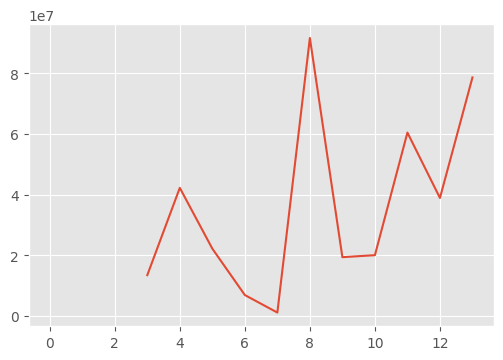

In [86]:
post_rev_ts = u_movie_df[['title', 'release_date', 'revenue', 'budget', 'ROI', 'TW_release_date', 'log_revenue', 'log_budget', 'log_ROI']][u_movie_df['release_date'] >= covid_date].sort_values(by='release_date').reset_index(drop=True)
post_rev_df = post_rev_ts.set_index('release_date')

post_rev_by_month_df = post_rev_df.resample('M').agg('mean').to_period('M')
post_rev_by_month_df.reset_index(inplace=True)
post_rev_by_month_df['month'] = post_rev_by_month_df['release_date'].apply(lambda x: x.month)
post_rev_by_month_df['release_date'] = post_rev_by_month_df['release_date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m'))
post_rev_by_month_df['Time'] = np.arange(0, post_rev_by_month_df.shape[0] + 0)
post_rev_by_month_df.head(12)
post_rev_by_month_df['revenue'].plot()

該 model 的解釋力非常差，因此這個標準並不適用於後續的預測上。

**季線**：以季節為單位

在這裏，我們將季節分為春夏秋冬（1, 2, 3, 4）。通常，冬天和夏天是兩大我們較為熟悉的電影季節。除了有暑假與寒假之外，我們也可以透過上面所做過的 visual analysis 看出冬天時節上映的電影較多。但我們真正好奇的是，既然冬天上映較多電影，他的票房有沒有也較平均來的高呢？

In [91]:
rev_by_quarter_df = rev_df.resample('Q-NOV', convention='end').agg('mean')
rev_by_quarter_df.reset_index(inplace=True)
rev_by_quarter_df['month'] = rev_by_quarter_df['release_date'].apply(lambda x: x.month)
rev_by_quarter_df['Time'] = np.arange(0, rev_by_quarter_df.shape[0] + 0)
rev_by_quarter_df['Quarter'] = rev_by_quarter_df['month'].replace({2: 4, 5: 1, 8: 2, 11: 3})
rev_by_quarter_df.head()

,release_date,revenue,budget,ROI,log_revenue,log_budget,log_ROI,Time,month,Quarter
0,2000-02-29,8.170775e+07,3.190000e+07,1.704464,18.007960,17.146781,0.861179,0,2,4
1,2000-05-31,9.859933e+07,4.400000e+07,1.926759,18.050645,17.346320,0.704325,1,5,1
2,2000-08-31,1.467532e+08,6.159000e+07,1.576416,18.607943,17.778313,0.829630,2,8,2
3,2000-11-30,1.175250e+08,5.857464e+07,1.448453,18.094090,17.581509,0.512581,3,11,3
4,2001-02-28,1.047660e+08,4.791176e+07,1.468739,18.090057,17.483975,0.606082,4,2,4


In [90]:
rev_by_quarter_df.groupby('Quarter').mean()

,revenue,budget,ROI,log_revenue,log_budget,log_ROI,Time,month
Quarter,,,,,,,,
1,7.648045e+07,3.660047e+07,1.357379,17.611503,17.083021,0.528481,39,5
2,9.908168e+07,4.167431e+07,1.723555,17.888806,17.174756,0.714050,40,8
3,7.429494e+07,3.485263e+07,1.340019,17.492256,17.024523,0.467732,41,11
4,8.972589e+07,3.910989e+07,1.616560,17.845358,17.159643,0.685714,40,2


In [92]:
x_name = 'Time'
y_name = 'revenue'

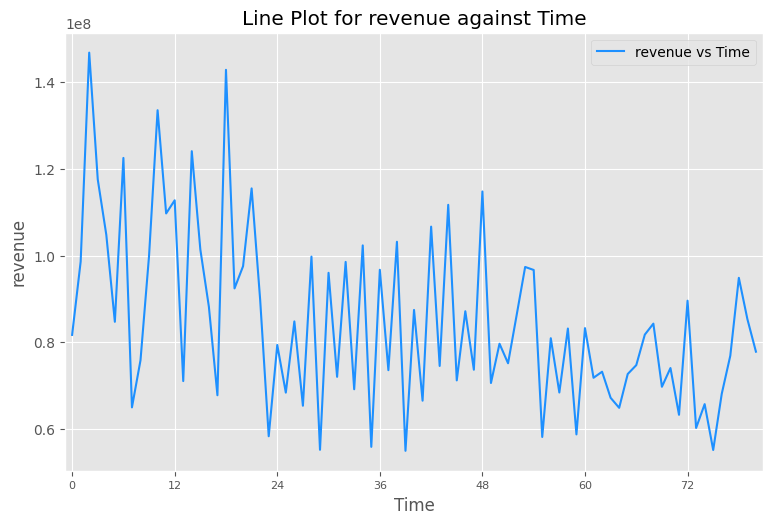

In [93]:
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(rev_by_quarter_df[x_name], rev_by_quarter_df[y_name], color="dodgerblue", label=f'{y_name} vs {x_name}')
plt.xticks(rev_by_quarter_df[x_name], rotation=0, fontsize=8)

plt.subplots_adjust(bottom=0.15)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title(f'Line Plot for {y_name} against {x_name}')

ax.set_xticks(ax.get_xticks()[::12]) # show the data of the first month for each year
plt.margins(x=.01, tight=False)
plt.legend()
plt.show()

轉換成季節之後，我們可以看到**夏天**通常會是票房的高峰期。

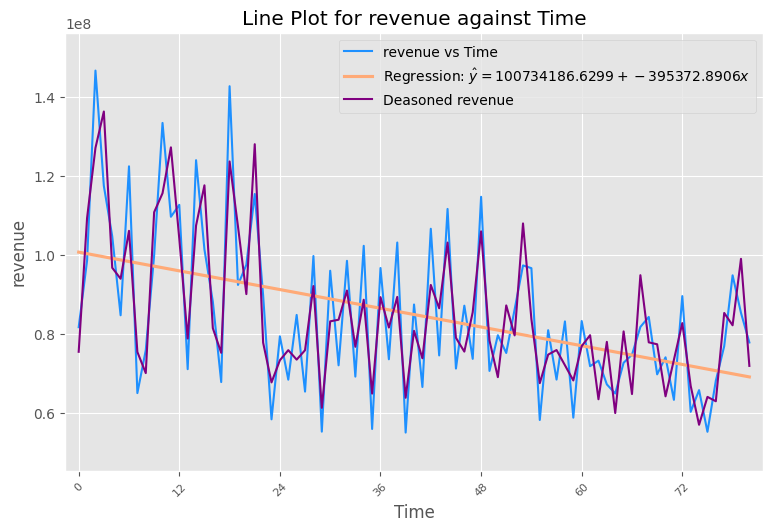

In [94]:
des_df = mgt2001.ts.smoothing(rev_by_quarter_df, y_name, x_name, period=4, option='cma')
des_df.head()

des_y_name = f'Des_{y_name}'

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(rev_by_quarter_df[x_name], rev_by_quarter_df[y_name], color="dodgerblue", label=f'{y_name} vs {x_name}')
plt.xticks(rev_by_quarter_df[x_name], rotation=45, fontsize=8)

slope, intercept, r_value, p_value, std_err = stats.linregress(des_df[x_name], des_df[des_y_name])  # order matters
ax = sns.regplot(x=x_name, y=des_y_name, data=des_df, ci=None, scatter_kws={'color': 'dodgerblue', 'alpha': 0}, line_kws={
                'color': '#ffaa77', 'label': f"Regression: $\hat y = {intercept:.4f} + {slope:.4f} x$"}) # 這樣才有 regression model
plt.plot(des_df[des_y_name], label=f'Deasoned {y_name}', color='purple')
plt.subplots_adjust(bottom=0.15)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title(f'Line Plot for {y_name} against {x_name}')
ax.set_xticks(ax.get_xticks()[::12]) # show the data of the first month for each year
mgt2001.add_margin(ax, x=0.02)
plt.legend()
plt.show()

In [95]:
dd = pd.DataFrame(des_df['SeaIdx'][:4])
dd['Quarter'] = (dd.index) % 4 + 1
dd['Quarter'] = np.append(dd['Quarter'].shift(-1).dropna(), 1)
dd

,SeaIdx,Quarter
0,1.082653,2.0
1,0.901449,3.0
2,1.154120,4.0
3,0.861779,1.0


根據我們所算出的結果，我們確實可以看出一個 seasonal pattern，秋季和冬季反而變成兩大高峰期。  
從這裡已經沒有必要繼續往下做了，我們可以總結出，雖然乍看之下電影票房有季節性的變化，但仍是難以預測的。

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



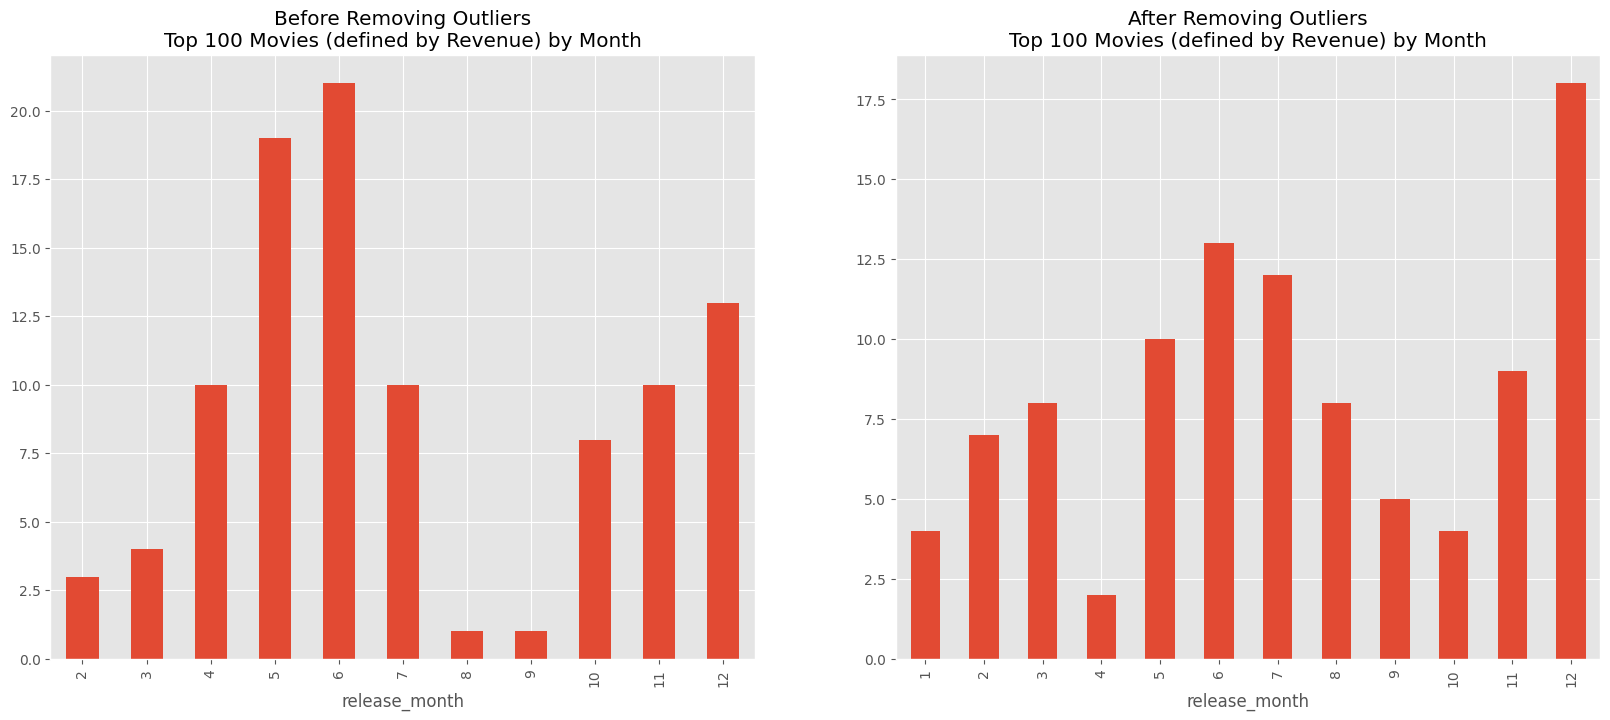

In [129]:
movie_df = pd.read_excel('../data/sorted_all_movie.xlsx', engine='openpyxl', index_col=0)
covid_date = datetime(2020, 3, 1)
movie_df['has_collection'] = movie_df['belongs_to_collection'].isna().replace({True: 0, False: 1})
movie_df['pre_covid'] = (movie_df['release_date'] < covid_date).replace({True: 1, False: 0})
movie_df['post_covid'] = (movie_df['release_date'] >= covid_date).replace({True: 1, False: 0})
movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.year)
movie_df['release_month'] = movie_df['release_date'].apply(lambda x: x.month)

# Plot
fig = plt.figure(figsize=(20, 8))
row, col = 1, 2
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(row, col, 1)
month_movie_df = movie_df.copy()
month_movie_df['release_month'] = month_movie_df['release_date'].apply(lambda x: x.month)
ax = month_movie_df.sort_values(by='revenue', ascending=False).head(100)[['release_date', 'title', 'zh_title', 'revenue', 'release_month']].groupby('release_month').count()['release_date'].plot(kind='bar', legend=None)
plt.title('Before Removing Outliers\nTop 100 Movies (defined by Revenue) by Month')

ax = fig.add_subplot(row, col, 2)
ax = u_movie_df.sort_values(by='revenue', ascending=False).head(100)[['release_date', 'title', 'zh_title', 'revenue', 'release_month']].groupby('release_month').count()['release_date'].plot(kind='bar', legend=None)
plt.title('After Removing Outliers\nTop 100 Movies (defined by Revenue) by Month')

plt.show()

從上面表格我們可以看出，在移除 outlier 前後，排名前 100 的電影，都在 5, 6 月佔了大多數，這點從 monthly trend 中也能看出。  
而另一個高峰期，確實出現在 11 或 12 月。可以看到 1 月上映的電影都不曾出現在百大電影裡面。

因為電影牽涉到太多人為因素，實在不能百分之百肯定地說一定什麼月份票房比較好。

##### 回到正題，所以過年時真的有因為這歡樂的氣氛導致票房更高嗎？

我們預期：每年在聖誕假期（12/24 ~ 1/3）的電影票房都會比較好。這裏的資料在上面已經處理完畢。


雖然顯示為沒有，但我們還是做一個更為精準的分析，using $t$-test and estimator of $\mu_1 - \mu_2$.

##### Check Normality
$H_0$: The population is normally distributed.  
$H_1$: The population is not normally distributed.

In [99]:
xmas_df = pd.DataFrame({'no': rev_ts[rev_ts.is_xmas == 0]['revenue'].values})
xmas_df['yes'] = rev_ts[rev_ts.is_xmas == 1]['revenue'].reset_index(drop=True)
y_xmas = xmas_df['yes'].dropna()
n_xmas = xmas_df['no'].dropna()
xmas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      2041 non-null   int64  
 1   yes     183 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 32.0 KB


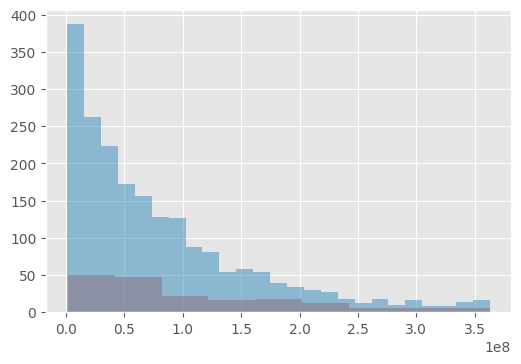

In [100]:
_ = plt.hist(y_xmas, bins = 'auto', alpha=0.5)
_ = plt.hist(n_xmas, bins = 'auto', alpha=0.5)
plt.show()

因為資料不是常態分佈，因此我們使用 Wilcoxon Rank Sum Test 來做檢定。

##### Wilcoxon Rank Sum Test
$H_0$: The two population locations are the same.  
$H_1$: Population 1 (y_xmas) is located to the right (n_xmas) of population 2 (greater).  

In [101]:
n1 = y_xmas.shape[0]
n2 = n_xmas.shape[0]

if np.sum(np.array([n1, n2]) > 10) == 2:
    print('Both datasets have sizes larger than 10.\n')
    updated_df, result_dict = non.ranksum_z_test(df=xmas_df, to_compute='no', alternative='less') 

Both datasets have sizes larger than 10.

======= z-test =======
T (sum of ranks) = 2233366.5
(n1, n2) = (2041, 183)
mu_t = 2270612.5
sigma_t = 8321.879670483106
z statistic value (observed) = -4.4757
p-value = 0.0000 (Overwhelming Evidence)
Reject H_0 (less) → True



In this case, we can perform the standardized test, since both sample sizes are larger than 10. The $p$-value of the standardized test is $0.0000 < 0.05$, which means that we can reject the null hypothesis.

結論：聖誕節所上映的電影確實較剩餘年度的票房要高。

#### 3. 夏天的電影比較熱門？
因為有南北半球的問題，我們在這邊先行省略南半球的天氣。在此，夏天的意思是指 6、7、8 月。  
透過上面的視覺化分析，我們預期夏天的電影可能會較其他季節來的更夯一些。

In [102]:
cond = np.array(rev_ts['release_month'] == 6) | (rev_ts['release_month'] == 7) | (rev_ts['release_month'] == 8) 
rev_ts['Season'] = rev_ts['release_month'].replace({12: 4, 1: 4, 2: 4, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3})
rev_ts['Summer'] = cond.replace({True: 1, False: 0})

In [103]:
rev_ts.head()

,title,release_date,revenue,budget,ROI,TW_release_date,log_revenue,log_budget,log_ROI,Time,is_xmas,release_year,release_month,Season,Summer
0,Scream 3,2000-02-03,161834276,40000000,3.045857,NaN,18.902083,17.504390,1.397693,10990.0,0,2000,2,4,0
1,The Beach,2000-02-03,144056873,40000000,2.601422,NaN,18.785719,17.504390,1.281329,10990.0,0,2000,2,4,0
2,The Tigger Movie,2000-02-11,45554533,30000000,0.518484,NaN,17.634421,17.216708,0.417713,10998.0,0,2000,2,4,0
3,Boiler Room,2000-02-18,28780255,7000000,3.111465,NaN,17.175200,15.761421,1.413779,11005.0,0,2000,2,4,0
4,The Whole Nine Yards,2000-02-18,106371651,41300000,1.575585,NaN,18.482450,17.536373,0.946077,11005.0,0,2000,2,4,0


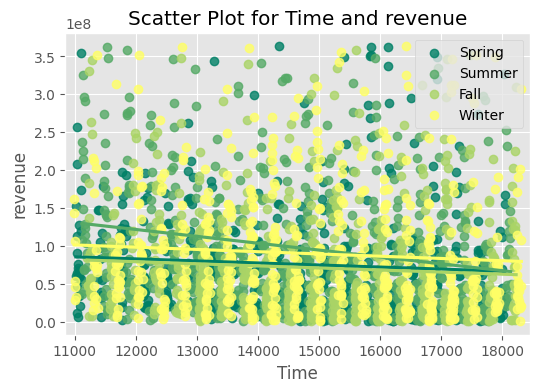

In [104]:
mgt2001.model.multi_variable_plot(x_name=x_name, y_name=y_name, df=rev_ts, indicator='Season', label={1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, cmap='summer')

In [105]:
long_df = rev_ts.copy()
long_df = long_df[['Season', 'revenue', 'log_revenue']] # .dropna()
treatment_name_list = long_df['Season'].unique() 
display(long_df.head())

,Season,revenue,log_revenue
0,4,161834276,18.902083
1,4,144056873,18.785719
2,4,45554533,17.634421
3,4,28780255,17.175200
4,4,106371651,18.482450


In [106]:
display(long_df.groupby(['Season']).describe())

revenue                                                      \
         count          mean           std        min          25%   
Season                                                               
1        481.0  7.584783e+07  7.497693e+07   956425.0  21819348.00   
2        514.0  9.751019e+07  8.441897e+07  1000000.0  31182405.75   
3        659.0  7.100076e+07  7.413020e+07   992181.0  15823357.00   
4        570.0  8.992305e+07  8.074660e+07   970816.0  29998390.00   

                                              log_revenue             \
               50%           75%          max       count       mean   
Season                                                                 
1       56359980.0  1.005418e+08  363164265.0       481.0  17.578840   
2       77428980.0  1.404472e+08  362211740.0       514.0  17.858246   
3       43928932.0  1.003920e+08  358375603.0       659.0  17.424869   
4       64303142.0  1.247696e+08  363204635.0       570.0  17.830273   

                                                                         
             std        min        25%        50%        75%        max  
Season                                                                   
1       1.229557  13.770959  16.898308  17.847270  18.426084  19.710366  
2       1.257328  13.815512  17.255350  18.164868  18.760342  19.707740  
3       1.315182  13.807662  16.576995  17.598084  18.424590  19.697092  
4       1.126927  13.785893  17.216645  17.979118  18.641979  19.710477

夏天的電影票房確實有略高一點！

##### Check Normality

+ $H_0$: The population is normally distributed.  
+ $H_1$: The population is not normally distributed.

In [107]:
anova.shapiro(long_df, treatment_name_list, 'Season', 'revenue')

1: Statistics=0.8631, p=0.0000
2: Statistics=0.8217, p=0.0000
3: Statistics=0.8922, p=0.0000
4: Statistics=0.8222, p=0.0000


以上四個 p-value 都小於 0.05，代表所有資料都不是常態分佈，所以我們使用 Kruskal-Wallis Test。

##### Kruskal-Wallis Test
+ $H_0$: The locations of all the $4$ populations are the same.  
+ $H_1$: Not all $4$ population locations are the same.

In [108]:
long_df.groupby('Season')

short_df = pd.DataFrame([long_df[long_df['Season'] == 3]['revenue'].values, long_df[long_df['Season'] == 4]['revenue'].values, long_df[long_df['Season'] == 2]['revenue'].values, long_df[long_df['Season'] == 1]['revenue'].values]).T.reset_index(drop=True)
short_df.columns = [3, 4, 2, 1]
# short_df[2].dropna().shape

In [109]:
_ = non.kruskal_chi2_test(data=short_df)

======= Kruskal-Wallis Test with Chi-squared Test =======
(All sample size >= 5)

H statistic value (observed) = 50.9955
chi2 critical value = 7.8147
p-value = 0.0000 (Overwhelming Evidence)
Reject H_0 (Not all 4 population locations are the same) → True
    


上述結果僅能告訴我們，這四個季節的票房變化，確實有所差異。所以我們進一步用 Wilcoxon Rank Sum Test 來應證夏天電影相較於其他季節要高的事實。

##### Wilcoxon Rank Sum Test
$H_0$: The two population locations are the same.  
$H_1$: Population 2 is located to the right of the other population (greater).

##### 夏天 vs. 冬天

In [110]:
n1 = short_df.loc[:, 2].dropna().shape[0]
n2 = short_df.loc[:, 4].dropna().shape[0]

if np.sum(np.array([n1, n2]) > 10) == 2:
    print('Both datasets have sizes larger than 10.\n')
    updated_df, result_dict = non.ranksum_z_test(df=short_df[[2, 4]], to_compute=2, alternative='greater') # 

Both datasets have sizes larger than 10.

======= z-test =======
T (sum of ranks) = 285726
(n1, n2) = (514, 570)
mu_t = 278845.0
sigma_t = 5146.8704083161065
z statistic value (observed) = 1.3369
p-value = 0.0906 (Weak Evidence)
Reject H_0 (greater) → False



##### 夏天 vs. 秋天

In [111]:
n1 = short_df.loc[:, 2].dropna().shape[0]
n2 = short_df.loc[:, 3].dropna().shape[0]

if np.sum(np.array([n1, n2]) > 10) == 2:
    print('Both datasets have sizes larger than 10.\n')
    updated_df, result_dict = non.ranksum_z_test(df=short_df[[2, 3]], to_compute=2, alternative='greater') # 

Both datasets have sizes larger than 10.

======= z-test =======
T (sum of ranks) = 336963
(n1, n2) = (514, 659)
mu_t = 301718.0
sigma_t = 5756.621723430042
z statistic value (observed) = 6.1225
p-value = 0.0000 (Overwhelming Evidence)
Reject H_0 (greater) → True



##### 夏天 vs. 春天

In [112]:
n1 = short_df.loc[:, 2].dropna().shape[0]
n2 = short_df.loc[:, 1].dropna().shape[0]

if np.sum(np.array([n1, n2]) > 10) == 2:
    print('Both datasets have sizes larger than 10.\n')
    updated_df, result_dict = non.ranksum_z_test(df=short_df[[2, 1]], to_compute=2, alternative='greater') # 

Both datasets have sizes larger than 10.

======= z-test =======
T (sum of ranks) = 275404
(n1, n2) = (514, 481)
mu_t = 255972.0
sigma_t = 4529.947240310863
z statistic value (observed) = 4.2897
p-value = 0.0000 (Overwhelming Evidence)
Reject H_0 (greater) → True



因為以上 3 個檢定的 $p$-value 都小於 0.05，有足夠的證據顯示夏天的票房高於其他三季。  
此結果與我們預期的相符。有點意外的是，在[過年大片是不是真的比較夯？](#過年大片是不是真的比較夯)的分析中，我們可以總結出聖誕季節（包含 1/1 新年）時所上映的電影平均來說真的有較高的趨勢。以季節性來說，卻不是如此。我們可以看到夏天的電影平均來說有較高的票房，其次是春天，冬天與秋天都遠不及夏天所創下的票房。

### 結論懶人包
#### 七、票房與電影級數的關係
G和PG的票房最高，其次是PG-13，最後是R。電影票房確實與客群範圍大小有關。

#### 八、票房與上映時間的關係
+ 寒暑假是否比較多電影  
  沒有足夠的證據顯示寒暑假上映的電影比較多。
+ 過年期間票房是否相對較高  
  聖誕節所上映的電影確實較剩餘年度的票房要高。
+ 夏天的電影比較熱門？  
  夏季票房相較其他季節來得高。